In [146]:
import networkx as nx

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import pandas as pd
import networkx as nx

# data was taken from here: https://www.stats.ox.ac.uk/~snijders/siena/tutorial2010_data.html

# I will visualize the second wave of survey
friendship = pd.read_fwf('klas12b/klas12b-net-2.dat', widths=[3] * 26, header=None)
delinquency = pd.read_fwf('klas12b/klas12b-delinquency.dat', widths=[2] * 4, header=None)
primary = pd.read_fwf('klas12b/klas12b-primary.dat', widths=[2] * 26, header=None)


In [147]:
delinquency

,0,1,2,3
0,2,2,3,5
1,1,0,1,2
2,2,2,1,4
3,2,2,3,2
4,1,1,2,1
5,1,1,1,1
6,1,2,2,2
7,1,1,2,1
8,0,2,3,3
9,2,2,2,2


In [148]:
delinquency[[1]]

,1
0,2
1,0
2,2
3,2
4,1
5,1
6,2
7,1
8,2
9,2


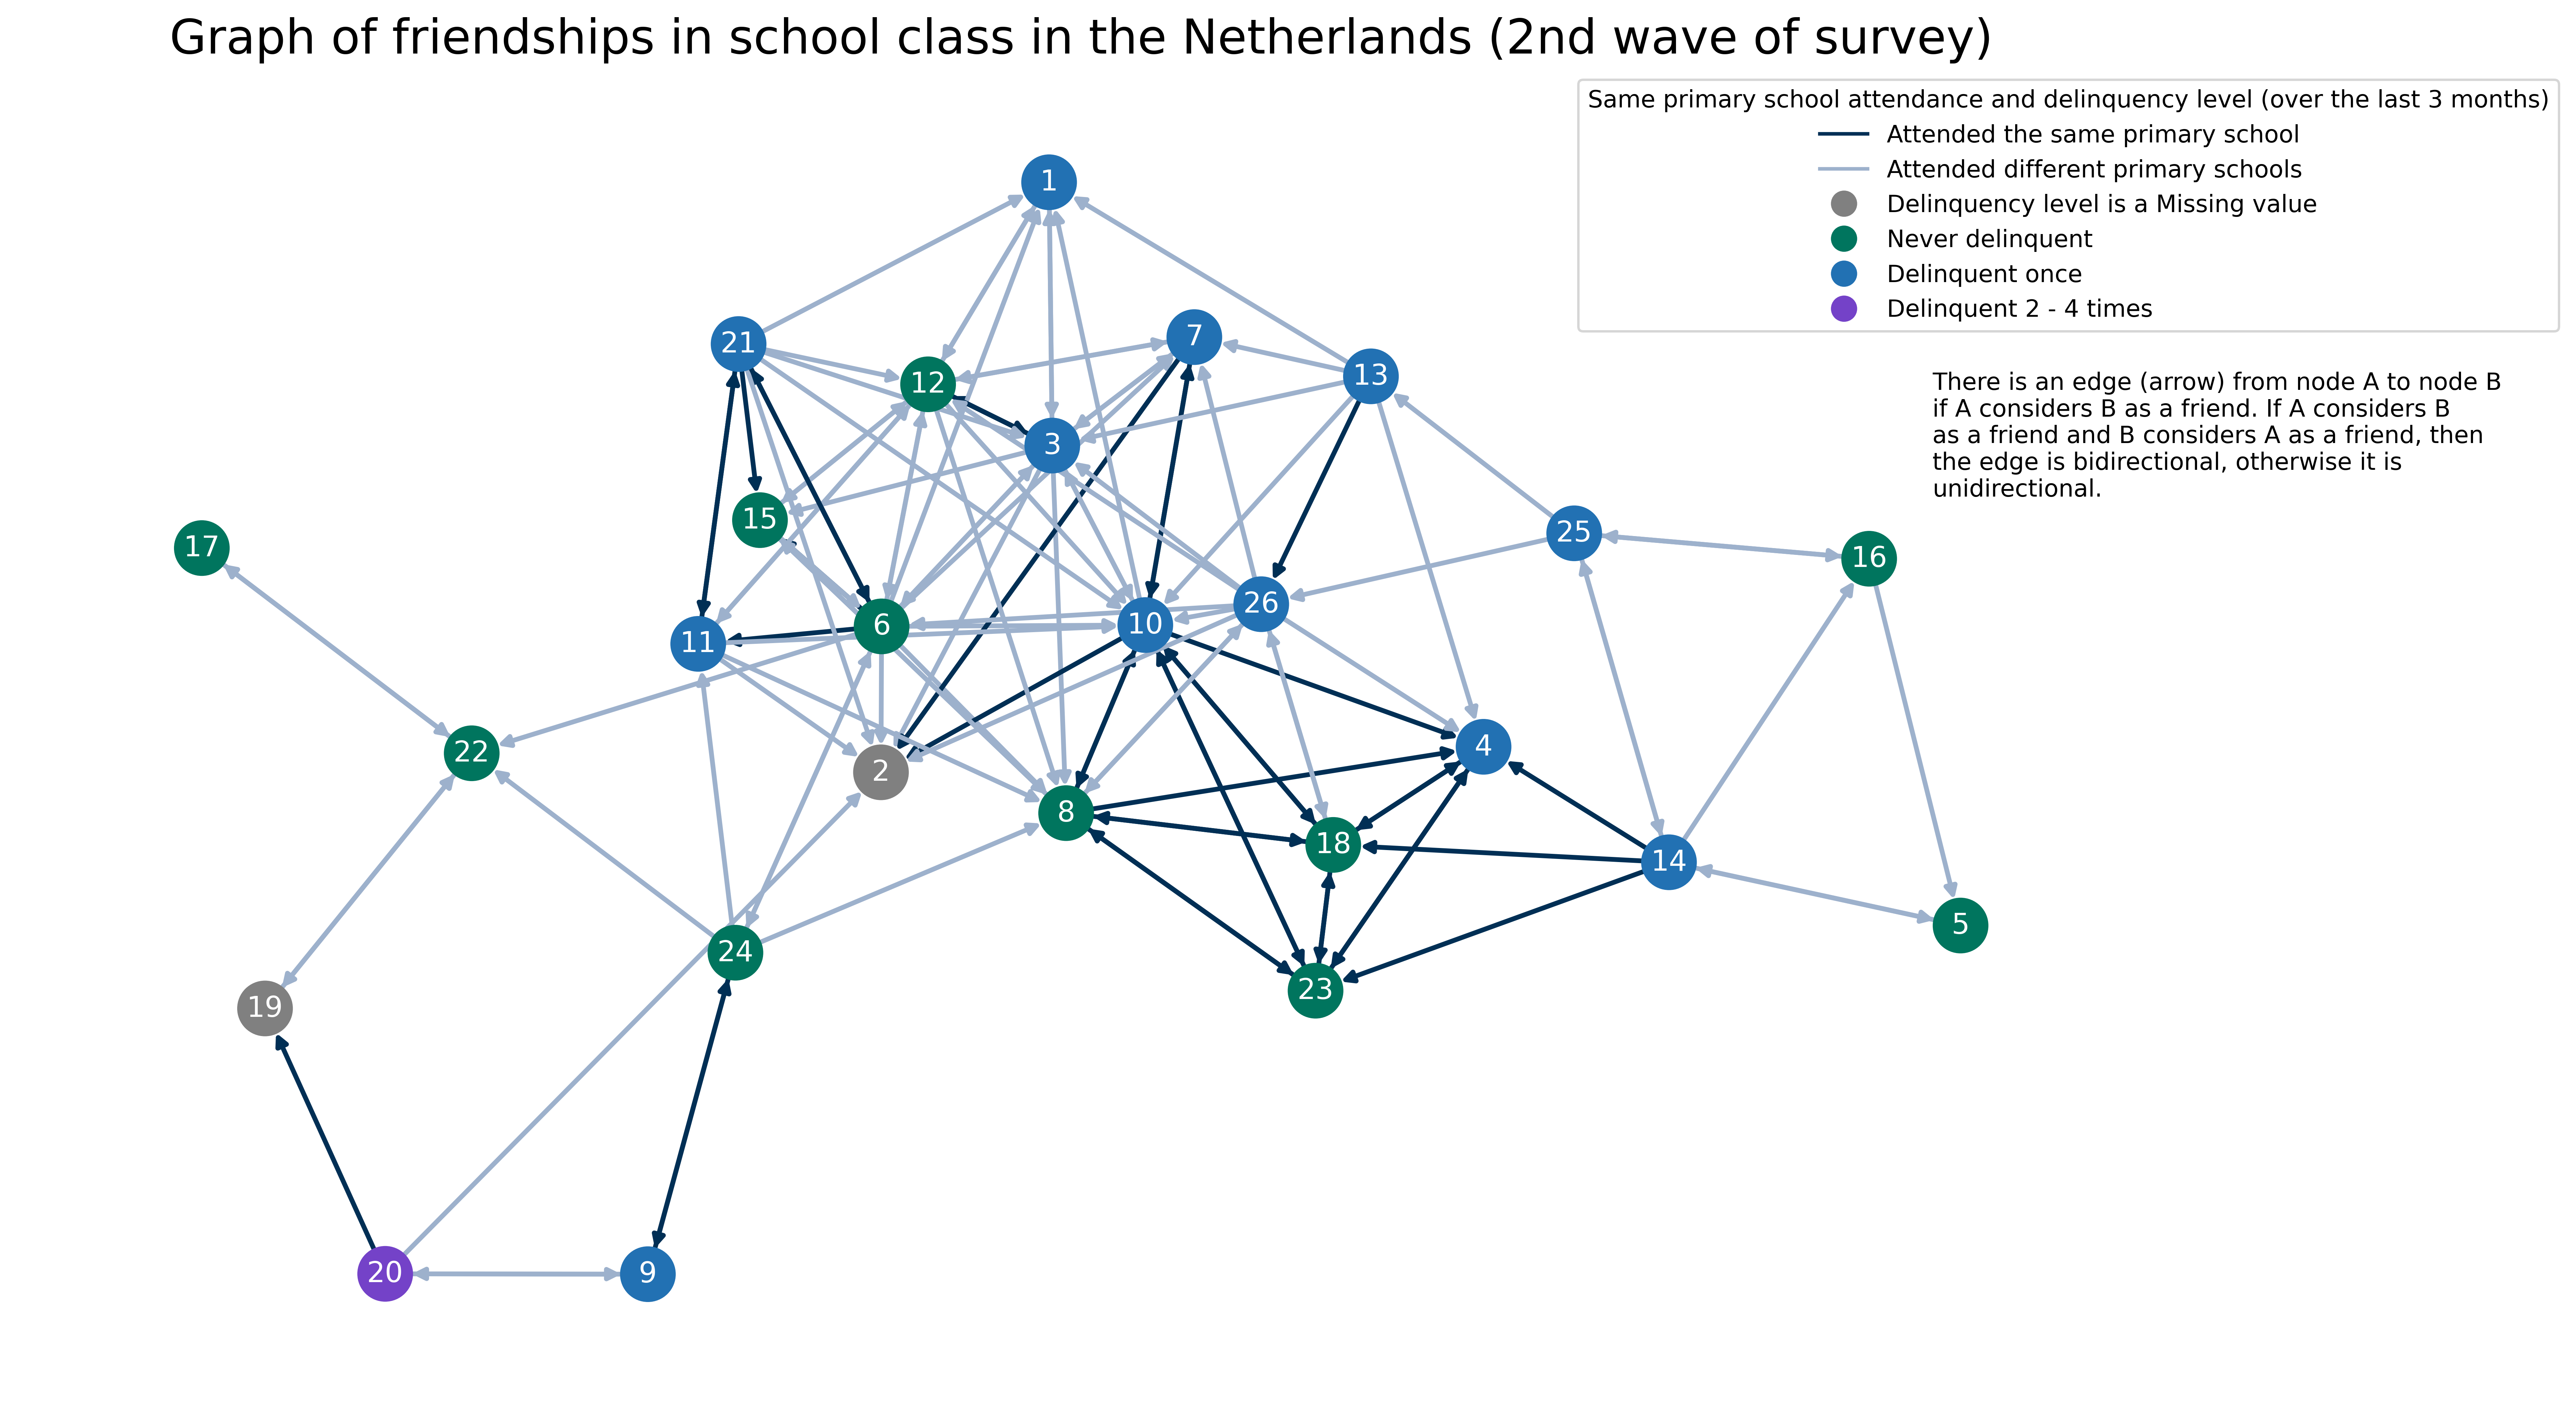

In [159]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

graph = nx.DiGraph()

graph.add_nodes_from(range(1, 26))


edge_colors = []
for i in range(26):
    for j in range(26):
        if i != j and friendship.iloc[i, j] == 1: #a person cannot be a friend of himself, we dont want to draw loops
            if primary.iloc[i, j] == 1:
                edge_colors.append('#002F55')  #if they were in the same class in the primary school
            else:
                edge_colors.append('#9DB1CC')  #if not
            graph.add_edge(i + 1, j + 1)

delinquency_colors = {0: 'grey', 1: '#00755e', 2: '#2271B3', 3: '#7442C8', 4: 'orange', 5: 'red'}
node_colors = [delinquency_colors[val] for val in delinquency[1].values]

fig, ax = plt.subplots(1, 1, figsize=(16, 10), dpi=500)
pos = nx.kamada_kawai_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=500, node_color=node_colors, edge_color=edge_colors, width=2, arrowsize=10, font_color='white')


legend_handles_delinquency = [mpatches.Patch(color=color, label=f'Delinquency Level {key}') for key, color in delinquency_colors.items()]


black_patch = plt.Line2D([], [], color='#002F55', label='Attended the same primary school')
gray_patch = plt.Line2D([], [], color='#9DB1CC', label='Attended different primary schools')
level0_patch = plt.Line2D([0],[0], color='grey', marker='o', markersize=10, linestyle='None',  label='Delinquency level is a Missing value')
level1_patch = plt.Line2D([0],[0], color='#00755e', marker='o', markersize=10, linestyle='None', label='Never delinquent ')
level2_patch = plt.Line2D([0],[0], color='#2271B3', marker='o', markersize=10, linestyle='None', label='Delinquent once ')
level3_patch = plt.Line2D([0],[0], color='#7442C8', marker='o', markersize=10, linestyle='None',  label='Delinquent 2 - 4 times ')
level4_patch = plt.Line2D([0],[0], color='orange', marker='o', markersize=10, linestyle='None',  label='Delinquent 5 - 10 times ')
level5_patch = mlines.Line2D([], [], color='red', marker='o', markersize=10, linestyle='None', label='Delinquent more that 10 times ')


all_handles = [black_patch, gray_patch] + [level0_patch, level1_patch, level2_patch, level3_patch]

plt.legend(handles=all_handles, loc='upper right', bbox_to_anchor=(1.2, 1), title = 'Same primary school attendance and delinquency level (over the last 3 months)')
ax.text(0.9, 0.77, 
"""There is an edge (arrow) from node A to node B 
if A considers B as a friend. If A considers B
as a friend and B considers A as a friend, then
the edge is bidirectional, otherwise it is 
unidirectional.""", 
    fontsize=10, 
    transform=ax.transAxes,
    verticalalignment="top" )
plt.title('Graph of friendships in school class in the Netherlands (2nd wave of survey)', fontdict={'fontsize': 20})
plt.show()

Some points that made this visualization difficult:
1. There were several loops in the data, so I removed them: in my opinion, a person cannot be a friend to himself. These loops just make the graph unreadable because they are not important in this graph.
2. There's a significant  amount of edges in this dataset, which makes it hard to read with all layouts except kamada_kawai_layout, so I decided to use that.
3. I added color to the edges (depending on whether people attended the same primary school) and added color to the vertices (depending on delinquency), so the legend had to display both values, but using different labels (line and circle)+ the legends had to be combined into one otherwise they overlapped. Thus, visualization of the legend caused a difficulty too